<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Decision_Tree_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

In [43]:
df_train = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/test.csv")

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
dataset = df_train[['Pclass','Sex','Age','Survived']]
print("Total", len(dataset))
print(dataset.isnull().sum())

Total 891
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64


In [46]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
dataset = dataset.dropna()
print(len(dataset))

714


In [48]:
gender_map = {'male':0, 'female':1}
dataset['Sex'] = dataset.Sex.map(gender_map)

In [49]:
dataset.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


1. Create Test Train Split

In [50]:
X = dataset.drop(['Survived'],axis='columns')
y = dataset.Survived

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=0)
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Total 714
Train size  571
Test size  143


2) Build a Log Reg Model with pipeline with Standard Scalar using train data

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [53]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

3. Calculate Score for test data

In [54]:
print("Training", pipe.score(X_train, y_train))
print("Test", pipe.score(X_test, y_test))

Training 0.7758318739054291
Test 0.8461538461538461


4. Print model metrics(f1 score, accuracy, etc)

Decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree = DecisionTreeClassifier(criterion='gini') #entropy or gini
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
print("Training", dtree.score(X_train, y_train))
print("Test", dtree.score(X_test, y_test))

Training 0.8949211908931699
Test 0.8041958041958042


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
y_hat = pipe.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        79
           1       0.83      0.83      0.83        64

    accuracy                           0.85       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143



In [60]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[68, 11],
       [11, 53]])

Text(15.0, 0.5, 'Truth')

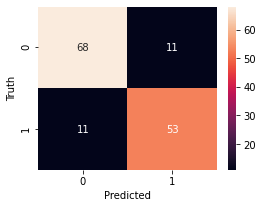

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
class_names = ['Survived', 'Not Survived']

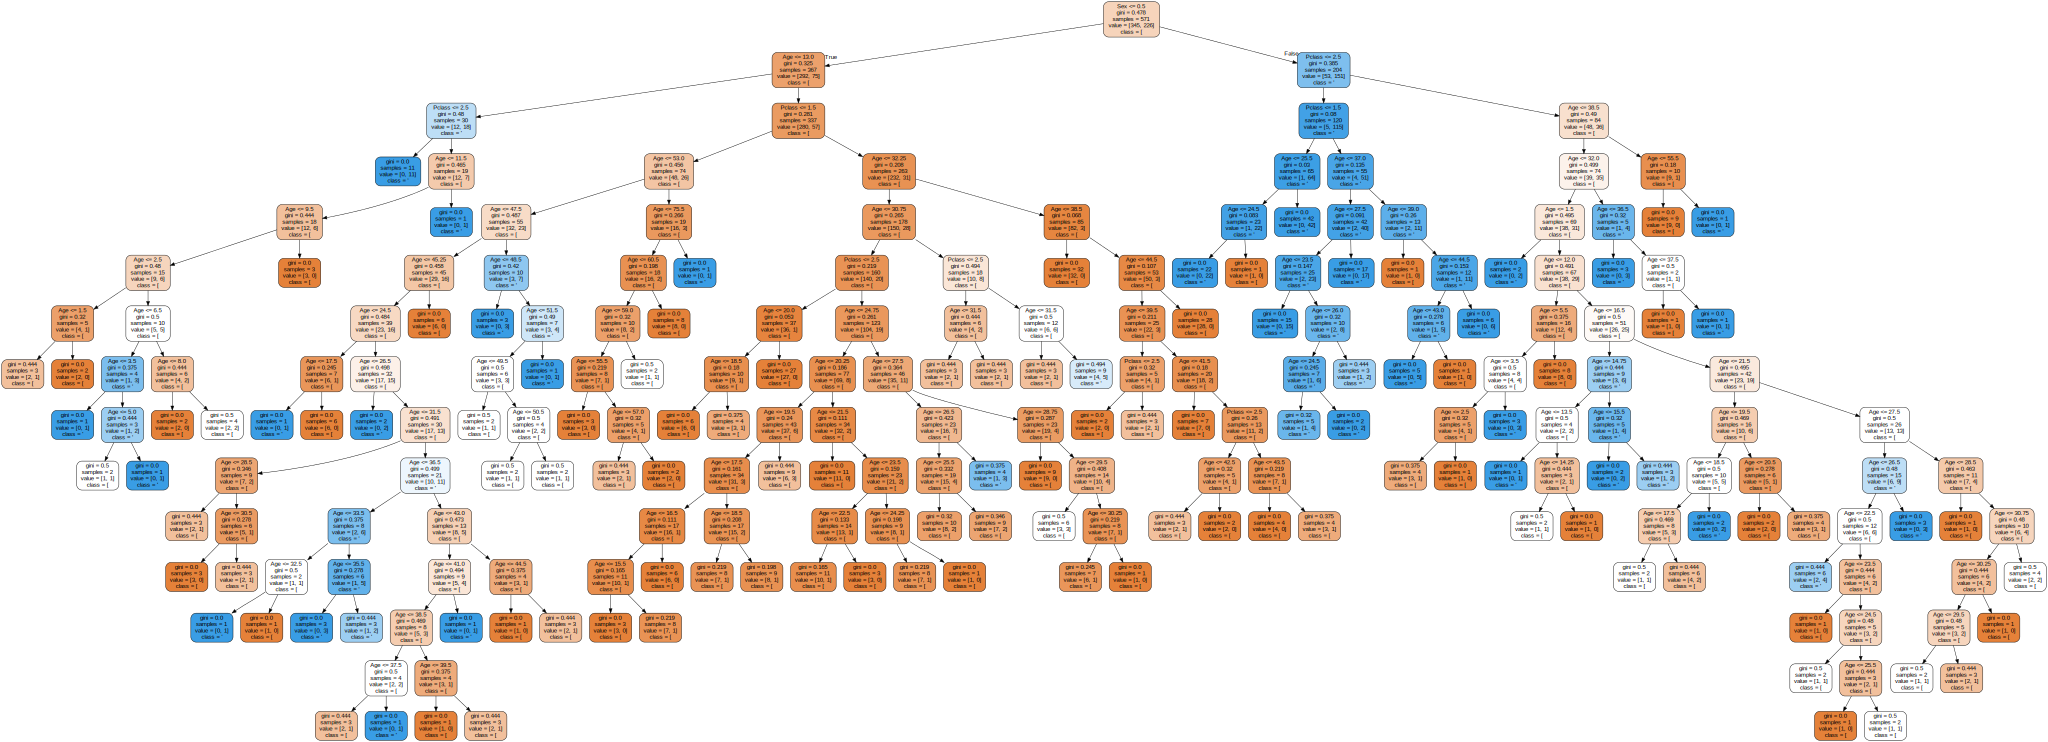

In [64]:
import graphviz
from sklearn import tree

feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled = True, rounded=True, feature_names=feature_names, class_names=str(class_names))
graph = graphviz.Source(dot_data)
graph